In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-28 13:11:22.499112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone6S_I(ii) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone6S/iPhone6S_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0390625-0.03125j   0.0078125+0.j        0.0078125-0.0234375j ...
 0.0546875+0.0234375j 0.0078125-0.046875j  0.015625 +0.0078125j]
2048
135317
(2048, 135317)
[0.02546153 0.01366557 0.00427903 ... 0.00281807 0.00462026 0.01327868]
0
(10000, 2048)
(10000,)
[0.0078125-0.015625j  0.0234375-0.0078125j 0.0078125-0.0078125j ...
 0.03125  -0.0234375j 0.03125  -0.015625j  0.046875 -0.0078125j]
2048
119078
(2048, 119078)
[0.02263446 0.01218112 0.00445602 ... 0.00229932 0.00412573 0.01206476]
1
(20000, 2048)
(20000,)
[0.015625 -0.03125j   0.03125  +0.j        0.0078125-0.015625j  ...
 0.0234375-0.0078125j 0.       -0.046875j  0.       -0.015625j ]
2048
110376
(2048, 110376)
[0.02308455 0.0121083  0.00366661 ... 0.0021352  0.00424122 0.01211808]
2
(30000, 2048)
(30000,)
[ 0.015625 -0.0234375j  0.0234375-0.0234375j  0.0234375-0.015625j  ...
  0.0234375-0.015625j  -0.0078125-0.03125j    0.0390625-0.03125j  ]
2048
123906
(2048, 123906)
[0.02295604 0.01222045 0.00480958 ... 0.00225782 0.00426049 0.0

## Cross-model Validation

## iPhone6S_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_model.h5")
model.summary()

2023-02-28 13:23:09.593514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 5.9659 - accuracy: 0.1877
test loss, test acc: [5.9658708572387695, 0.18774999678134918]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[2239  535 1953  641    0  103   12  588 2595 1334]
 [  15   25   16    0    0    0 5733  376 1449 2386]
 [2022  692 3241  865    0  350    9  691 1674  456]
 [2270  453 1844  251    0   80   12  532 2266 2292]
 [5344  211 1012  484    1  224    9  436 1606  673]
 [3041  535 2933  686    1  374   10  280 1406  734]
 [   0    1    0    0    0    0 9745   52   56  146]
 [1186 1291 4980 1039    0  155    7  353  711  278]
 [3690  655 2749 1637   19  702   11  104  394   39]
 [2148  155  572  179    0   72   39 1048 3635 2152]]
              precision    recall  f1-score   support

           0       0.10      0.22      0.14     10000
           1       0.01      0.00      0.00     10000
           2       0.17      0.32      0.22     10000
           3       0.04      0.03      0.03     10000
           4       0.05      0.00      0.00     10000
           5       0.18      0.04      0.06     10000
           6       0.63      0.9

Test Accuracy:0.18775


Text(0.5, 1.0, 'Accuracy:0.188')

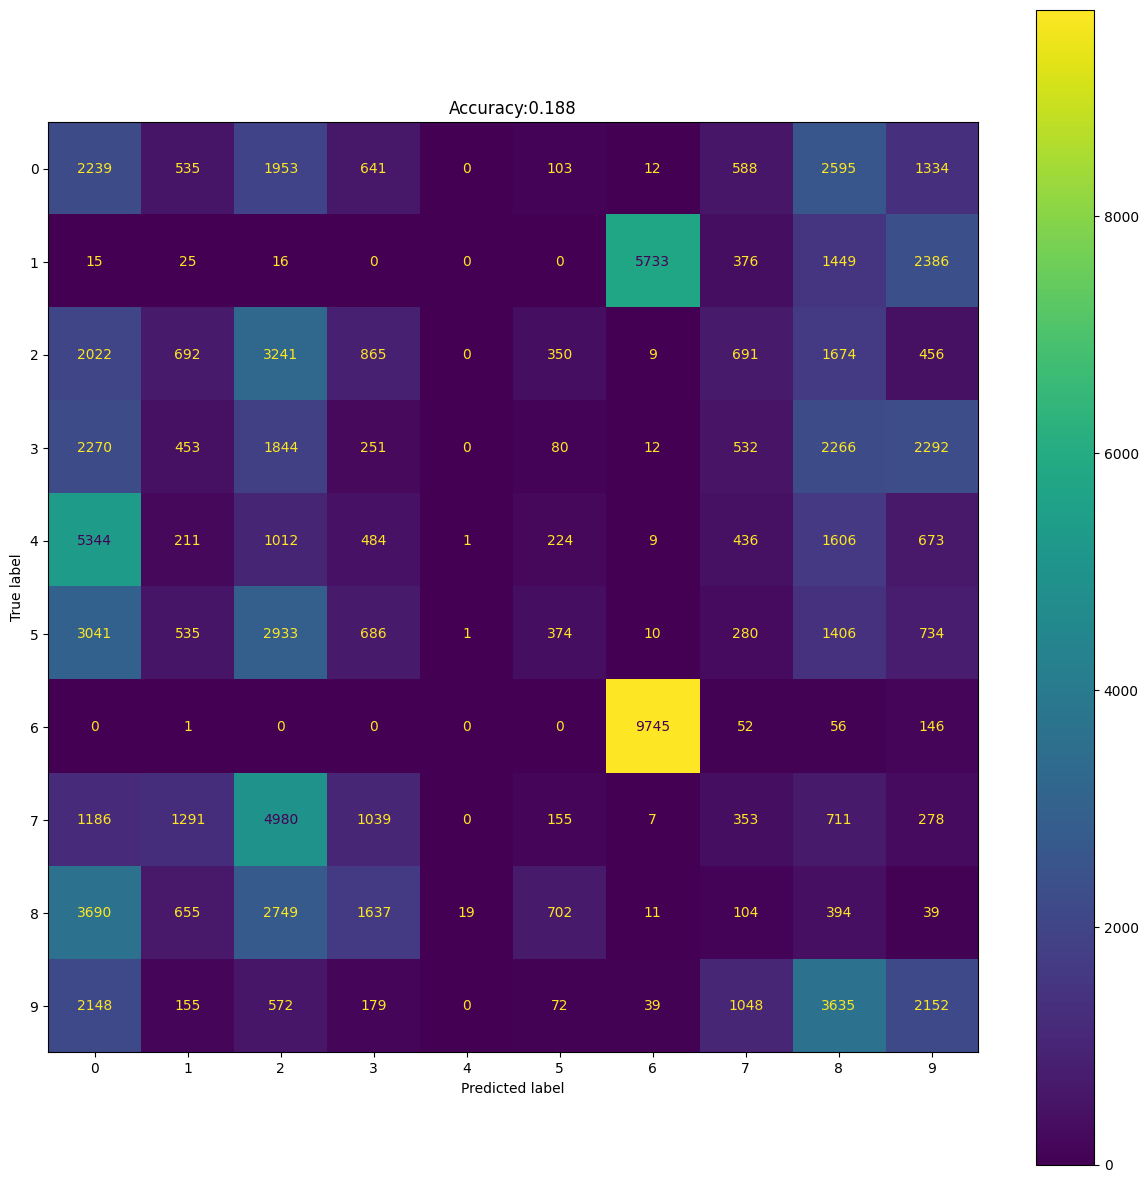

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 4ms/step - loss: 2.6817 - accuracy: 0.2473
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6889 - accuracy: 0.3709
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.5387 - accuracy: 0.4188
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4954 - accuracy: 0.4317
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4755 - accuracy: 0.4409
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4642 - accuracy: 0.4453
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4559 - accuracy: 0.4475
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4493 - accuracy: 0.4510
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4442 - accuracy: 0.4528
Epoch 10/30
3125/3125 [==============================] - 10s 3ms/step - l

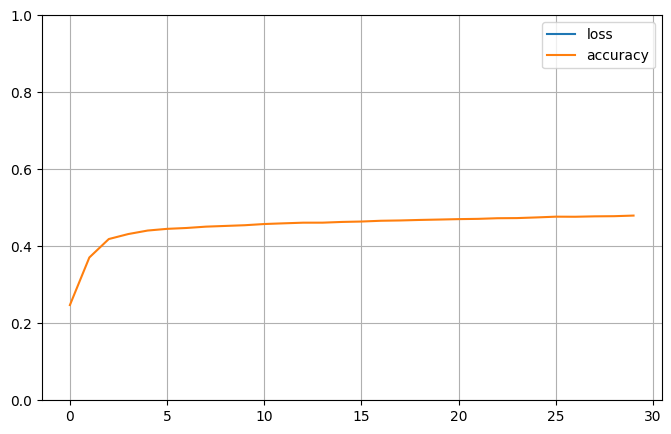

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.3853 - accuracy: 0.4795
test loss, test acc: [1.385326862335205, 0.47947001457214355]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[1684  120  695 1927 1190  889   11  852  833 1799]
 [   7 8331    0   70    0    0 1197    0    0  395]
 [ 830   10 2015 1307  844 1331   10 1833 1296  524]
 [ 565  136  468 4252 1324  885   10  532  347 1481]
 [ 392   11  343 1254 4430  790   13  201 1387 1179]
 [ 529   18  765 1700 1361 1947   14 1129 2001  536]
 [   0 1319    0    3    0    0 8666    0    0   12]
 [ 530    1 1158  710  172 1104   11 4883 1332   99]
 [ 148    1  354  173 1065 1002   10  697 6529   21]
 [ 756  557  296 1329 1378  247   13   95  119 5210]]
              precision    recall  f1-score   support

           0       0.31      0.17      0.22     10000
           1       0.79      0.83      0.81     10000
           2       0.33      0.20      0.25     10000
           3       0.33      0.43      0.37     10000
           4       0.38      0.44      0.41     10000
           5       0.24      0.19      0.21     10000
           6       0.87      0.8

Test Accuracy:0.47947


Text(0.5, 1.0, 'Accuracy:0.479')

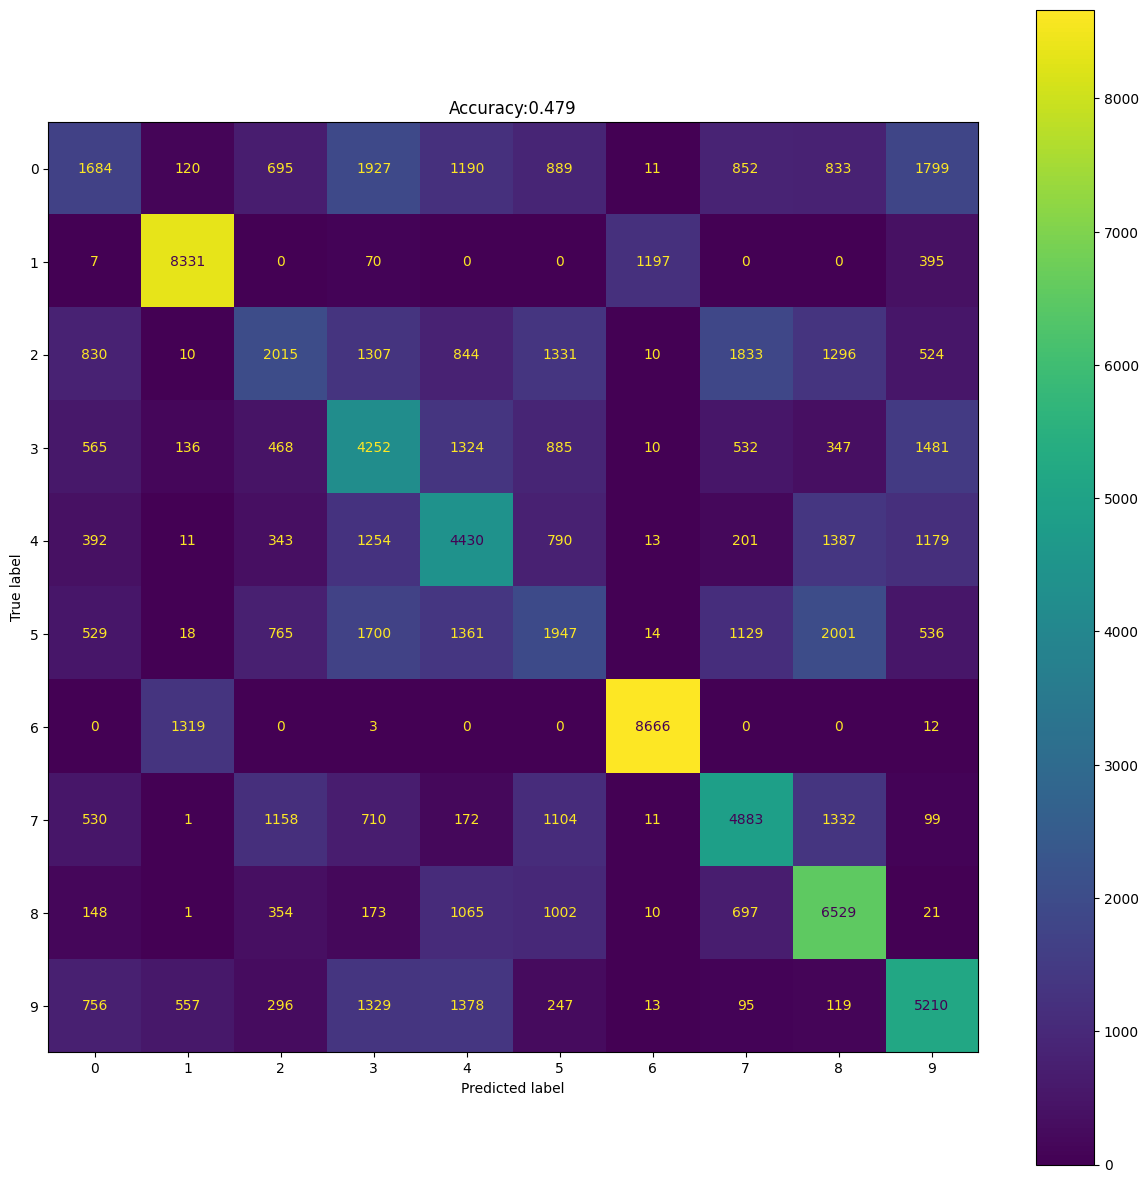

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I_BeSh model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_BeSh_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 11.3223 - accuracy: 0.1224
test loss, test acc: [11.322293281555176, 0.12240000069141388]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[2908 1425  850    0  131   80 2679 1925    0    2]
 [1005  880  837    0   62  224 4040 2940    0   12]
 [2698 1420  621    0   99   75 1838 3248    0    1]
 [1800 1952 1010    0  308   17 2923 1990    0    0]
 [1192 3885  992    0  350    4 1712 1865    0    0]
 [3031 1985 1528    0  321   58 1600 1477    0    0]
 [ 603 1222  990    0  168 1347 3938 1700    0   32]
 [2909  467  654    0   28  130 2321 3485    0    6]
 [3039 2488 1327    0  551    4 1287 1304    0    0]
 [1034 2466  520    0  189   58 3365 2368    0    0]]
              precision    recall  f1-score   support

           0       0.14      0.29      0.19     10000
           1       0.05      0.09      0.06     10000
           2       0.07      0.06      0.06     10000
           3       0.00      0.00      0.00     10000
           4       0.16      0.04      0.06     10000
           5       0.03      0.01      0.01     10000
           6       0.15      0.3

Test Accuracy:0.1224


Text(0.5, 1.0, 'Accuracy:0.122')

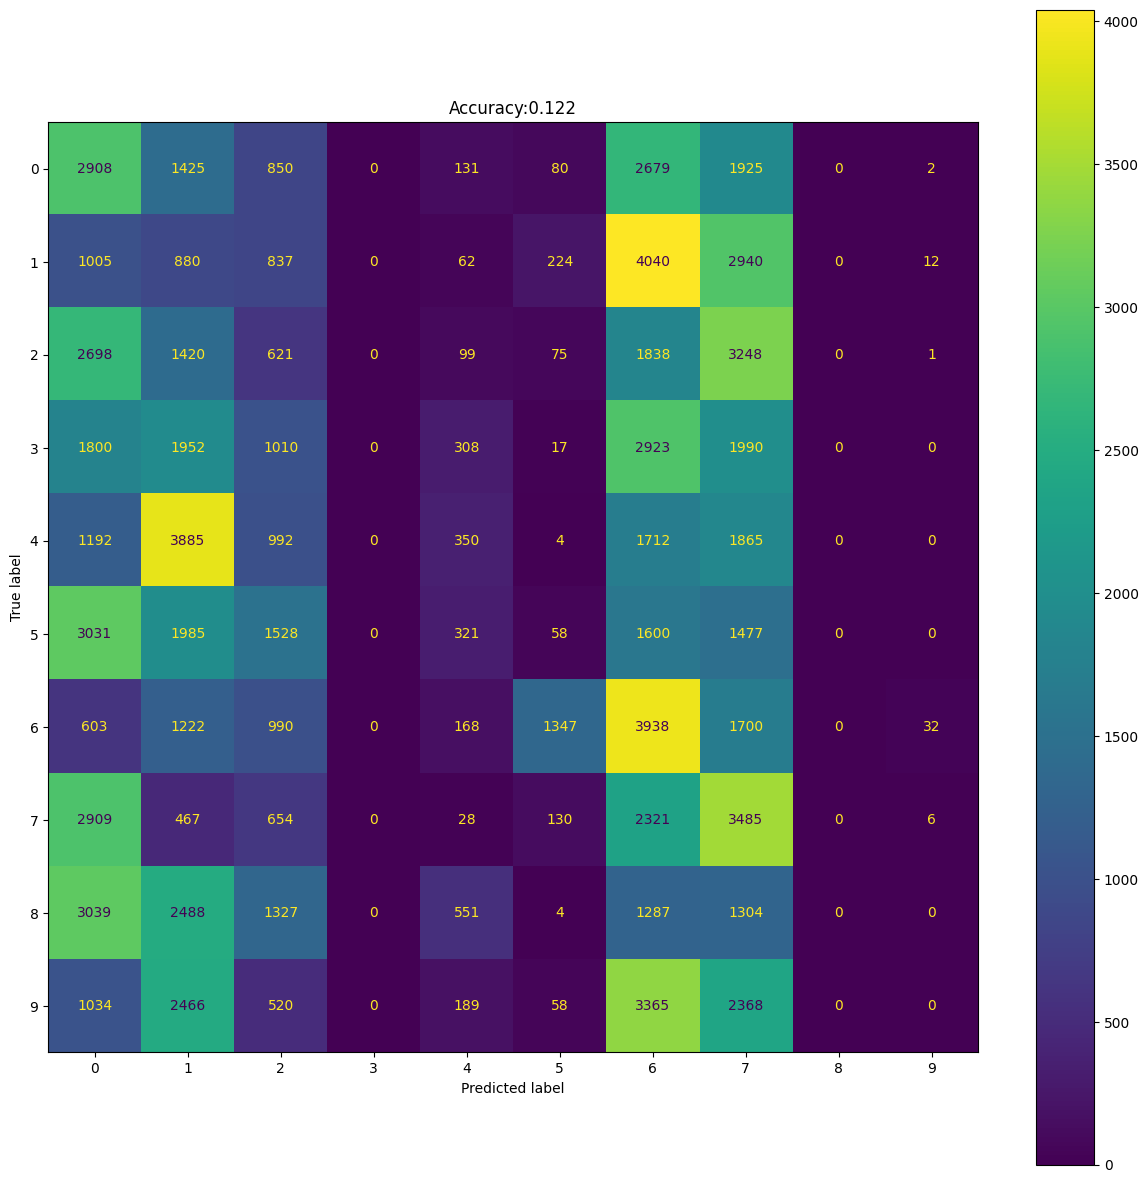

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.7980 - accuracy: 0.3553
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7949 - accuracy: 0.3582
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7918 - accuracy: 0.3591
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7884 - accuracy: 0.3597
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7854 - accuracy: 0.3608
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7830 - accuracy: 0.3630
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7801 - accuracy: 0.3642
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7766 - accuracy: 0.3669
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7745 - accuracy: 0.3687
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

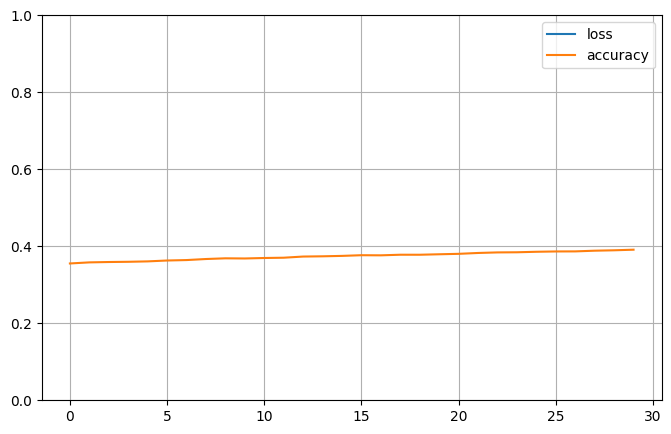

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.7358 - accuracy: 0.3753
test loss, test acc: [1.73578941822052, 0.3752500116825104]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[ 700 1063  558  532  450 3028  939 1378  431  921]
 [ 144 2719  231  558  634 1192 2503  857   32 1130]
 [ 267  581 2005  302  653 2722  433 1801  606  630]
 [ 116  758  285 1662 1079 3377  738  360  504 1121]
 [  80  404  253  528 4419 2271  345  110  671  919]
 [ 116  344  374  418  864 5469  477  751  656  531]
 [  40  596   37  167  253  358 7823  354    5  367]
 [ 192  578  675   75   55 1866  639 5257   46  617]
 [  74  114  366  577 1119 4081  121  235 3069  244]
 [  98  674  153  300  887 1704 1228  413  141 4402]]
              precision    recall  f1-score   support

           0       0.38      0.07      0.12     10000
           1       0.35      0.27      0.30     10000
           2       0.41      0.20      0.27     10000
           3       0.32      0.17      0.22     10000
           4       0.42      0.44      0.43     10000
           5       0.21      0.55      0.30     10000
           6       0.51      0.7

Test Accuracy:0.37525


Text(0.5, 1.0, 'Accuracy:0.375')

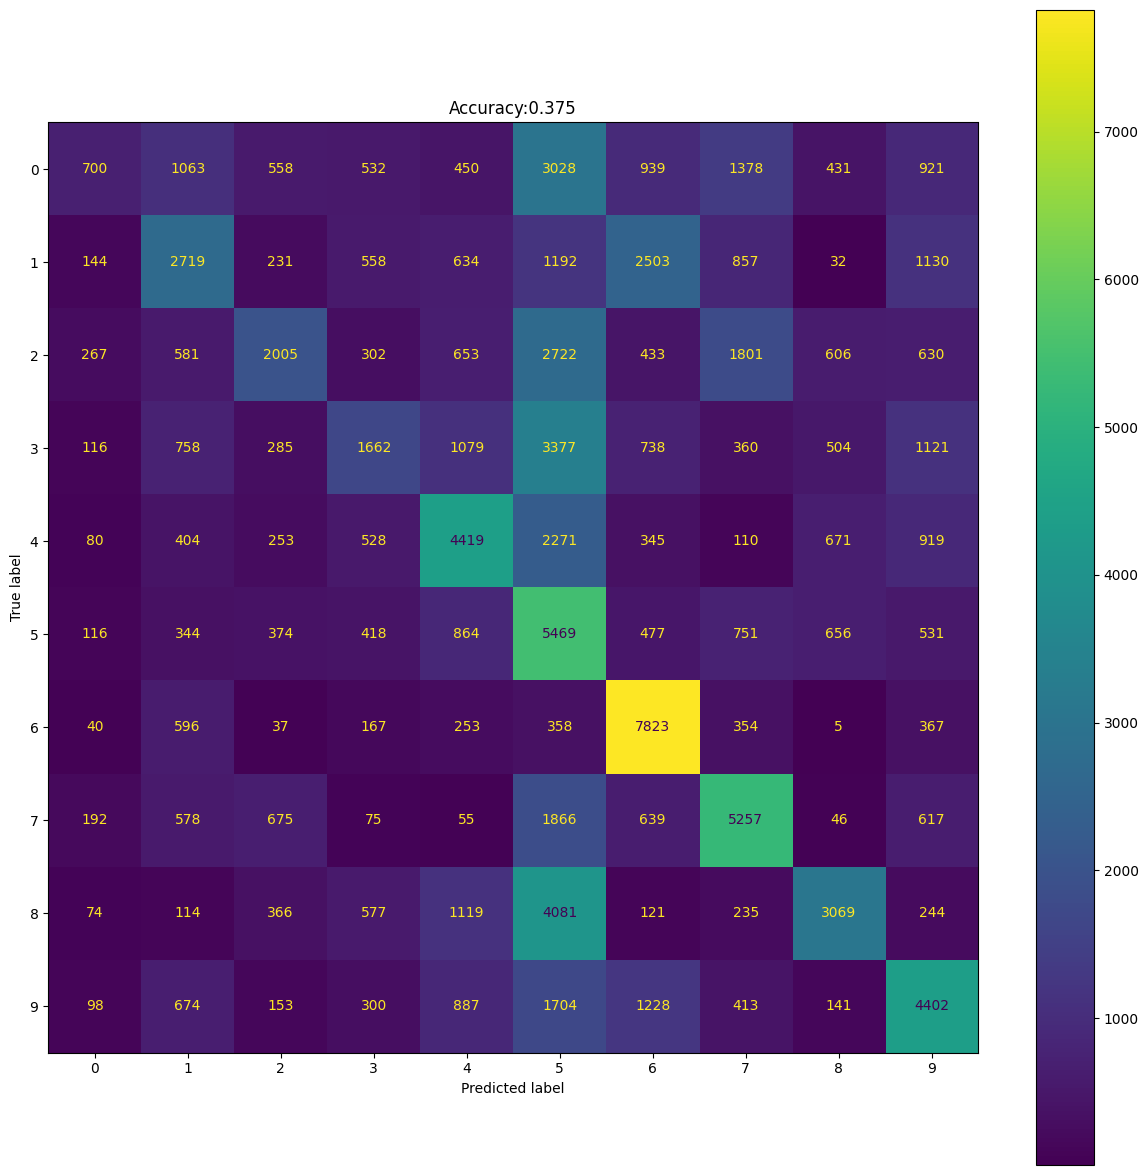

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')